In [2]:
pip install pandas sas7bdat


Note: you may need to restart the kernel to use updated packages.


In [3]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
from tabulate import tabulate

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D # for 3D plots

In [4]:
import pandas as pd
from sas7bdat import SAS7BDAT

# Ruta al archivo .sas7bdat
ruta_archivo = 'data/phase8_arf_2016_2021.sas7bdat'

# Leer el archivo .sas7bdat
with SAS7BDAT(ruta_archivo) as file:
    # Convertirlo en un dataframe
    df = file.to_data_frame()

# Mostrar el dataframe
df.head(5)


,ID,STATE,HISPANIC,MODECONT,PARTICIP,MODE_PRT,MM_DOB,B_ORDER,BRSTFED,CIG_1TRI,...,FRACE_MULTO_PU,PAT_RACE_PU,PAT_RACE_VT,VT_NONHISPANIC_WHITE,MAT_AGE_NAPHSIS_VT,FAGECOMB_VT,MAT_AGE_NAPHSIS_AK,FAGECOMB_AK,PAT_RACE_PU_AK,MAT_RACE_PU_AK
0,2016AK327002,AK,1.0,2.0,1.0,2.0,NaN,1.0,2.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,2.0
1,2016AK327006,AK,1.0,2.0,1.0,2.0,NaN,1.0,1.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,2.0,2.0
2,2016AK327007,AK,1.0,1.0,1.0,1.0,NaN,1.0,1.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,2.0,2.0
3,2016AK327009,AK,1.0,2.0,1.0,2.0,NaN,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,1.0,2.0
4,2016AK327010,AK,1.0,2.0,1.0,2.0,NaN,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,3.0


In [5]:
df_rescate=df

In [6]:
df.shape

(221381, 484)

In [7]:
df.dtypes

ID                     object
STATE                  object
HISPANIC              float64
MODECONT              float64
PARTICIP              float64
                       ...   
FAGECOMB_VT           float64
MAT_AGE_NAPHSIS_AK    float64
FAGECOMB_AK           float64
PAT_RACE_PU_AK        float64
MAT_RACE_PU_AK        float64
Length: 484, dtype: object

In [8]:
for column_name in df.columns:
    print(column_name)

ID
STATE
HISPANIC
MODECONT
PARTICIP
MODE_PRT
MM_DOB
B_ORDER
BRSTFED
CIG_1TRI
CIG_2TRI
CIG_3TRI
CIG_PRIOR
DEFECT
DEL_1CS
DEL_FORC
DEL_RCS
DEL_VACM
DEL_VAG
DEL_VCS
FHISP_BC
FRACE_AMI
FRACE_BLK
FRACE_WHT
HISP_BC
INFER_TR
MARRIED
MAT_DEG
MAT_ED
MAT_HTFT
MAT_HTIN
MAT_PRWT
MAT_TRAN
MAT_WIC
MM_DIAB
MM_FEVER
MM_HBP
MM_LMP
MM_NOMD
MOMCIG
MOMLBS
MOMSMOKE
MRACE_AMI
MRACE_BLK
MRACE_WHT
OTH_TERM
P_PRTERM
PAT_ACK
PAT_DEG
PAT_ED
PAY
PLURAL
PNC_MTH
PNC_VST
POB
SEX
TRANS
YY4_DOB
YY4_LMP
TYPE
MOM_HTU
MOM_FEET
MOM_INCH
MOM_CM
MOMLBKGU
MOM_LBKG
BPG_DIAB8
BPG_HBP8
BPG_DEPRS8
HTH_ASMA
HTH_THYR
HTH_PCOS
HTH_ANX
VITAMIN
PRE_VIST
TYP_DOCT_RAW
TYP_OBGN_RAW
TYP_ILLN_RAW
TYP_INJR_RAW
TYP_BC_RAW
TYP_MH_RAW
TYP_DDS_RAW
TYP_OTHR_RAW
TYP_WHAT_RAW
PRE_VIT_RAW
PRE_WT_RAW
PRE_MORB_RAW
PRE_KIDS_RAW
PRE_PRBC_RAW
PRE_HLTH_RAW
PRE_STI_RAW
PRE_SMK_RAW
PRE_ABUS_RAW
PRE_MHDP_RAW
PRE_WORK_RAW
PRE_HIVT_RAW
INSWORK8
INSPAR
INSHCEX
INSMED
INSMIL
INSIHS
INSOTH
INSTYPE
INSNONE
PP8_NOPNC
PP8_WORK_RAW
PP8_PAR_RAW
PP8_HCEX_RAW
PP_MEDIC

In [9]:
df.describe()

,HISPANIC,MODECONT,PARTICIP,MODE_PRT,MM_DOB,B_ORDER,BRSTFED,CIG_1TRI,CIG_2TRI,CIG_3TRI,...,FRACE_MULTO_PU,PAT_RACE_PU,PAT_RACE_VT,VT_NONHISPANIC_WHITE,MAT_AGE_NAPHSIS_VT,FAGECOMB_VT,MAT_AGE_NAPHSIS_AK,FAGECOMB_AK,PAT_RACE_PU_AK,MAT_RACE_PU_AK
count,214463.000000,221381.000000,221381.0,221381.000000,210838.000000,216095.000000,218516.000000,219896.000000,219898.000000,219900.000000,...,210209.000000,179439.000000,4746.000000,5186.000000,5205.000000,1682.000000,5338.000000,891.000000,4313.000000,5001.000000
mean,1.175065,1.381112,1.0,1.360794,6.537991,1.018196,1.176985,0.795444,0.595390,0.527372,...,1.920279,5.479678,1.085756,1.080216,4.848223,5.285969,4.618209,5.038159,1.609321,1.767447
std,0.380024,0.712009,0.0,0.690151,3.386825,0.135823,0.381657,3.621079,3.011245,2.853222,...,0.270861,7.376057,0.280034,0.271653,1.134168,1.112754,1.302475,1.252729,0.802753,0.788738
min,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,1.000000,1.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000
25%,1.000000,1.000000,1.0,1.000000,4.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,2.000000,2.000000,1.000000,1.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000
50%,1.000000,1.000000,1.0,1.000000,7.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,2.000000,2.000000,1.000000,1.000000,5.000000,5.000000,4.000000,5.000000,1.000000,2.000000
75%,1.000000,2.000000,1.0,2.000000,9.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,2.000000,3.000000,1.000000,1.000000,6.000000,6.000000,5.000000,6.000000,2.000000,2.000000
max,2.000000,7.000000,1.0,7.000000,12.000000,3.000000,2.000000,98.000000,98.000000,98.000000,...,2.000000,23.000000,2.000000,2.000000,8.000000,8.000000,8.000000,8.000000,3.000000,3.000000


In [10]:
# !pip install pandas-profiling
# import pandas_profiling
# profile = pandas_profiling.ProfileReport(df)
# profile

## Data cleaning

In [11]:
df_porcentajes = (100*df.isna().sum()/len(df)).to_frame()
df_porcentajes.sort_values(0, ascending = False)

,0
SMK_NICTN,100.000000
PG8_PCOS,100.000000
FAGECOMB_AK,99.597526
FAGECOMB_VT,99.240224
PG8_LYME,98.648936
...,...
NEST_YR,0.000000
HI_TYPE,0.000000
TYPE,0.000000
YY4_DOB,0.000000


In [12]:
df['PRE_ABUS_RAW'].describe()

count    153119.000000
mean          1.534578
std           0.498805
min           1.000000
25%           1.000000
50%           2.000000
75%           2.000000
max           2.000000
Name: PRE_ABUS_RAW, dtype: float64

In [13]:
total_filas = len(df)

# Calcula el número de filas con valores nulos en el campo específico
filas_nulas = df['PRE_ABUS_RAW'].isnull().sum()

# Calcula el porcentaje de filas nulas
porcentaje_nulos = (filas_nulas / total_filas) * 100
print(f"El porcentaje de datos nulos en el campo 'PRE_ABUS_RAW' es: {porcentaje_nulos:.2f}%")

El porcentaje de datos nulos en el campo 'PRE_ABUS_RAW' es: 30.83%


In [14]:
moda_columna = df['PRE_ABUS_RAW'].mode().iloc[0] if not df['PRE_ABUS_RAW'].mode().empty else None
if moda_columna is not None:
    df['PRE_ABUS_RAW'].fillna(moda_columna, inplace=True)

In [15]:
total_filas = len(df)

# Calcula el número de filas con valores nulos en el campo específico
filas_nulas = df['PRE_ABUS_RAW'].isnull().sum()

# Calcula el porcentaje de filas nulas
porcentaje_nulos = (filas_nulas / total_filas) * 100
print(f"El porcentaje de datos nulos en el campo 'PRE_ABUS_RAW' es: {porcentaje_nulos:.2f}%")

El porcentaje de datos nulos en el campo 'PRE_ABUS_RAW' es: 0.00%


In [16]:
df['PRE_MHDP_RAW'].describe()

count    153242.000000
mean          1.573446
std           0.494578
min           1.000000
25%           1.000000
50%           2.000000
75%           2.000000
max           2.000000
Name: PRE_MHDP_RAW, dtype: float64

In [17]:
total_filas = len(df)

# Calcula el número de filas con valores nulos en el campo específico
filas_nulas = df['PRE_MHDP_RAW'].isnull().sum()

# Calcula el porcentaje de filas nulas
porcentaje_nulos = (filas_nulas / total_filas) * 100
print(f"El porcentaje de datos nulos en el campo 'PRE_MHDP_RAW' es: {porcentaje_nulos:.2f}%")

El porcentaje de datos nulos en el campo 'PRE_MHDP_RAW' es: 30.78%


In [18]:
moda_columna = df['PRE_MHDP_RAW'].mode().iloc[0] if not df['PRE_MHDP_RAW'].mode().empty else None
if moda_columna is not None:
    df['PRE_MHDP_RAW'].fillna(moda_columna, inplace=True)

In [19]:
total_filas = len(df)

# Calcula el número de filas con valores nulos en el campo específico
filas_nulas = df['PRE_ABUS_RAW'].isnull().sum()

# Calcula el porcentaje de filas nulas
porcentaje_nulos = (filas_nulas / total_filas) * 100
print(f"El porcentaje de datos nulos en el campo 'PRE_ABUS_RAW' es: {porcentaje_nulos:.2f}%")

El porcentaje de datos nulos en el campo 'PRE_ABUS_RAW' es: 0.00%


In [20]:
df['VPP_DEPR_RAW'].describe()

count    194072.000000
mean          1.875211
std           0.330480
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           2.000000
Name: VPP_DEPR_RAW, dtype: float64

In [21]:
total_filas = len(df)

# Calcula el número de filas con valores nulos en el campo específico
filas_nulas = df['VPP_DEPR_RAW'].isnull().sum()

# Calcula el porcentaje de filas nulas
porcentaje_nulos = (filas_nulas / total_filas) * 100
print(f"El porcentaje de datos nulos en el campo 'VPP_DEPR_RAW' es: {porcentaje_nulos:.2f}%")

El porcentaje de datos nulos en el campo 'VPP_DEPR_RAW' es: 12.34%


In [22]:
moda_columna = df['VPP_DEPR_RAW'].mode().iloc[0] if not df['VPP_DEPR_RAW'].mode().empty else None
if moda_columna is not None:
    df['VPP_DEPR_RAW'].fillna(moda_columna, inplace=True)

In [23]:
total_filas = len(df)

# Calcula el número de filas con valores nulos en el campo específico
filas_nulas = df['VPP_DEPR_RAW'].isnull().sum()

# Calcula el porcentaje de filas nulas
porcentaje_nulos = (filas_nulas / total_filas) * 100
print(f"El porcentaje de datos nulos en el campo 'VPP_DEPR_RAW' es: {porcentaje_nulos:.2f}%")

El porcentaje de datos nulos en el campo 'VPP_DEPR_RAW' es: 0.00%


In [24]:

# Calcula el porcentaje de valores faltantes para cada columna
df_porcentajes = (100 * df.isna().sum() / len(df)).to_frame()

# Ordena las columnas por el porcentaje de valores faltantes en orden descendente
df_porcentajes = df_porcentajes.sort_values(0, ascending=False)

# Filtra las columnas con un porcentaje mayor al 10%
columnas_a_eliminar = df_porcentajes[df_porcentajes[0] > 10].index

# Elimina las columnas del dataframe original
df = df.drop(columnas_a_eliminar, axis=1)

# Imprime las columnas eliminadas
print("Columnas eliminadas:")
print(columnas_a_eliminar)


Columnas eliminadas:
Index(['SMK_NICTN', 'PG8_PCOS', 'FAGECOMB_AK', 'FAGECOMB_VT', 'PG8_LYME',
       'PRE_HEPB', 'PRE_HEPB_RAW', 'SMK_CHEWCIGS', 'PG8_ALRGI', 'SMK_BETEL',
       ...
       'VPP_SMOK_RAW', 'BF5STILL_RAW', 'VPP_PRESBC_RAW', 'SLP_ROOM_RAW',
       'VPP_WAIT_RAW', 'VPP_ABUS_RAW', 'VPP_EAT_RAW', 'VPP_BCM_RAW', 'INSMIL',
       'HI_MILIT'],
      dtype='object', length=215)


In [25]:
for column_name in columnas_a_eliminar:
    print(column_name)

SMK_NICTN
PG8_PCOS
FAGECOMB_AK
FAGECOMB_VT
PG8_LYME
PRE_HEPB
PRE_HEPB_RAW
SMK_CHEWCIGS
PG8_ALRGI
SMK_BETEL
PG8_SC
PAT_RACE_PU_AK
HTH_SC
PG8_GUM
PRE_BDEF
PRE_BDEF_RAW
PAT_RACE_VT
PP_GOV2_RAW
PP_GOV2
MAT_RACE_PU_AK
SMK_CGRLO
VT_NONHISPANIC_WHITE
MAT_AGE_NAPHSIS_VT
MAT_AGE_NAPHSIS_AK
PG8_PRET
ASK_MERC
ASK_MERC_RAW
ASK_LABR
ASK_LABR_RAW
ASK_BDEF
ASK_BDEF_RAW
ASK_LEAD
ASK_LEAD_RAW
ASK_2HSM
ASK_2HSM_RAW
VPP_RXPAIN
VPP_DRNK
VPP_RXOTH
VPP_RXPAIN_RAW
VPP_DRNK_RAW
VPP_RXOTH_RAW
PG8_THYR
PG8_HRT
SLP2ALON
SLP2ALON_RAW
PG8_UTI
PG8_NAUS
VPP_GOING
VPP_GOING_RAW
HTH_ALRGI
PG8_IRON
PG8_SEIZ
ECIG_3B
ECIG_3L
PG8_ASMA
INSGOV2
HI_GOV2
PG8_ANX
SMK6_3B
SMK6_3N
SMK6_3L
BCB_HUSB
BCB_PREG
BCB_PNOW
BCB_WANT
BCB_NSEX
BCB_PAY
BCB_SIDE
BCB_PNOW_RAW
BCB_TUBE
BCB_OTH
BCB_HUSB_RAW
BCB_PREG_RAW
BCB_PAY_RAW
BCB_WANT_RAW
BCB_SIDE_RAW
HTH_HRT
BCB_OTH_RAW
BCB_TUBE_RAW
BCB_NSEX_RAW
SMK6_3N_RAW
SMK6_3L_RAW
SMK6_3B_RAW
HTH_SEIZ
ECIG_3L_RAW
ECIG_3B_RAW
FAGECOMB
NATIVITY
HTH_IRON
ATTEND_PU
SMK_CIGS
BF5LNGTH
BF5LNGTU
PP_CHIP
PP_

PG8_PCOS: Health prob during preg -- PCOS, thyroides, heart, nausea, allergies, anemia, epilepsy, asthma, anxiety <br>
PRE_HEPB: Pre-preg -- tested for Hep B (FORCED SKIP)<br>
SMK_CHEWCIGS: SMK -- chew, snus, cigars, cigarillos, etc.<br>
PG8_ALRGI: Allergies<br>
PRE_BDEF: Pre-preg -- birth defects (FORCED SKIP)<br>
PP_GOV2_RAW: Insurance paid by -- (state specific other state<br>
plan)<br>
ASK_MERC: HCW ask -- fish with mercury (FORCED SKIP)<br>
ASK_LABR: HCW ask -- labor starts early (FORCED SKIP)<br>
ASK_BDEF_RAW: HCW ask -- Birth defects or deseases/family<br>
ASK_LEAD_RAW: HCW ask -- about my risk for lead poisoning<br>
VPP_RXPAIN_RAW: PPV -- ask about taking prescrip pain relievers<br>
VPP_DRNK_RAW: PPV -- ask about drinking alcohol<br>
VPP_RXOTH_RAW: PPV -- ask about taking other prescrip meds<br>
SLP2ALON_RAW: Recommend sleep--place baby alone to sleep<br>
VPP_GOING_RAW: PPV -- breastfeeding status<br>
Breastfeeding Challenge<br>
BCB_HUSB_RAW:  PP BC barrs -- husb/part didnt want<br>
HTH_HRT: Health prob -- Heart<br>
NATIVITY: Mother US born?<br>
ATTEND_PU: Attendant at birth<br>
INSGOV: nsurance paid by -- (state specific other state
plan)<br>
BF5LNGTU_RAW: BF duration -- wks/mnths<br>
PAT_ACK: Acknowledgment of paternity<br>
PAD_FAM: Abuse -- during preg, another family member<br>
PRE_HLTH: Pre-preg -- improve health before preg (FORCED<br>
SKIP)<br>
**PRE_ABUS_RAW: Pre-preg --hurt emotional/physical**<br>
**PRE_MHDP_RAW: Pre-preg --feeling down/depressed** <br>
PRE_KIDS_RAW: Pre-preg -- want to have kids (FORCED SKIP)<br>
PRE_SMK_RAW: Pre-preg --smk during preg<br>
**VPP_DEPR_RAW: PPV -- ask about depression**<br>

In [26]:
df_porcentajes = (100*df.isna().sum()/len(df)).to_frame()
df_porcentajes.sort_values(0, ascending = False)

,0
INCOME8,9.030134
BFINF_HOT,8.511119
BFINF_HOT_RAW,8.195825
BFINF_GRP,8.042244
BFINF_GRP_RAW,7.719723
...,...
BCB_WHAT,0.000000
BCP_WHAT,0.000000
KESSNER,0.000000
STRATUMC,0.000000


In [27]:
df['INCOME8'].describe()

count    201390.000000
mean         13.016674
std          31.205774
min           1.000000
25%           2.000000
50%           7.000000
75%          12.000000
max         212.000000
Name: INCOME8, dtype: float64

In [28]:
df['INCOME8'].value_counts()

INCOME8
12.0     49401
1.0      38854
2.0      14919
6.0      11989
10.0     10750
3.0      10706
11.0     10463
8.0       9828
5.0       9570
7.0       8788
4.0       8012
9.0       6203
101.0     1197
19.0       888
212.0      865
112.0      757
13.0       724
22.0       695
201.0      582
102.0      387
110.0      332
107.0      331
14.0       319
210.0      315
104.0      300
103.0      297
111.0      285
106.0      284
202.0      277
17.0       276
105.0      274
207.0      263
206.0      262
208.0      244
211.0      244
108.0      242
18.0       235
204.0      218
203.0      215
109.0      175
205.0      175
209.0      136
21.0        58
20.0        55
Name: count, dtype: int64

In [29]:
def limpieza_datos(df):

    porcentaje_nulos = (df.isnull().sum() / len(df))
    
    # Identifica las columnas con más del 10% de valores nulos
    columnas_a_reemplazar = porcentaje_nulos[porcentaje_nulos > 0.1].index.tolist()
    
    # Reemplaza los valores nulos por la moda en las columnas seleccionadas
    for columna in columnas_a_reemplazar:
        moda_columna = df[columna].mode().iloc[0] if not df[columna].mode().empty else None
        if moda_columna is not None:
            df[columna].fillna(moda_columna, inplace=True)
    
    # Elimina las filas con valores nulos en las columnas restantes
    df = df.dropna()
    
    return df
    

In [30]:
df =limpieza_datos(df)

In [31]:
df_porcentajes = (100*df.isna().sum()/len(df)).to_frame()
df_porcentajes.sort_values(0, ascending = False)

,0
ID,0.0
ASK_ABUS,0.0
PP8_PAR,0.0
PP_MEDIC,0.0
PP_OTH,0.0
...,...
TLK_WT_RAW,0.0
ASK_MEDS_RAW,0.0
TLK_CIGS_RAW,0.0
TLK_ETOH_RAW,0.0


In [32]:
df.shape

(97216, 269)

In [33]:
# Especifica la ruta donde deseas guardar el archivo CSV y el nombre del archivo
ruta_archivo_csv = "data/phase8_arf_2016_2021_cleaned.csv"

# Guarda el DataFrame en un archivo CSV
df.to_csv(ruta_archivo_csv, index=False)

print("DataFrame limpio guardado exitosamente en el archivo CSV.")

DataFrame limpio guardado exitosamente en el archivo CSV.


In [34]:
for column_name in df.columns:
    print(column_name)

ID
STATE
HISPANIC
MODECONT
PARTICIP
MODE_PRT
MM_DOB
B_ORDER
BRSTFED
CIG_1TRI
CIG_2TRI
CIG_3TRI
CIG_PRIOR
DEFECT
DEL_1CS
DEL_FORC
DEL_RCS
DEL_VACM
DEL_VAG
DEL_VCS
FRACE_AMI
FRACE_BLK
FRACE_WHT
HISP_BC
INFER_TR
MARRIED
MAT_DEG
MAT_ED
MAT_HTFT
MAT_HTIN
MAT_PRWT
MAT_TRAN
MAT_WIC
MM_DIAB
MM_FEVER
MM_HBP
MM_LMP
MM_NOMD
MOMCIG
MOMLBS
MOMSMOKE
MRACE_AMI
MRACE_BLK
MRACE_WHT
OTH_TERM
P_PRTERM
PAY
PLURAL
PNC_MTH
PNC_VST
POB
SEX
TRANS
YY4_DOB
YY4_LMP
TYPE
MOM_HTU
MOM_FEET
MOM_INCH
MOM_CM
MOMLBKGU
MOM_LBKG
BPG_DIAB8
BPG_HBP8
BPG_DEPRS8
VITAMIN
PRE_VIST
TYP_WHAT_RAW
PRE_ABUS_RAW
PRE_MHDP_RAW
INSWORK8
INSPAR
INSHCEX
INSMED
INSOTH
INSTYPE
INSNONE
PP8_NOPNC
PP8_WORK_RAW
PP8_PAR_RAW
PP8_HCEX_RAW
PP_MEDIC_RAW
PP_OTH_RAW
PP_TYPE_RAW
PP_NONE_RAW
HI_WORK8
HI_PAR
HI_HCEX
HI_MEDIC
HI_OTH
HI_TYPE
HI_NONE
PGINTENT
PNC_1STU
PNC_1ST
TLK_WT_RAW
ASK_MEDS_RAW
TLK_CIGS_RAW
TLK_ETOH_RAW
ASK_ABUS_RAW
ASK_DPRS_RAW
ASK_DRUG_RAW
ASK_HIVT_RAW
ASK_BF_RAW
ASK_PPBC_RAW
FLUSHOT
FLUPREG
DDS_CLN
PG_GDB8
MORB_BP8
MH_PGDX8
SMK2YRS

In [35]:
df['MOMSMOKE'].describe()

count    97216.000000
mean         1.927183
std          0.259838
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          2.000000
Name: MOMSMOKE, dtype: float64

In [36]:
df['LANGUAGE'].describe()

count    97216.000000
mean         1.033852
std          0.186231
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: LANGUAGE, dtype: float64

In [37]:
df['MARRIED'].describe()

count    97216.000000
mean         1.347978
std          0.476331
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          2.000000
Name: MARRIED, dtype: float64

In [38]:
df['MACROSOMIA'].describe()

count    97216.000000
mean         1.989714
std          0.100899
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          2.000000
Name: MACROSOMIA, dtype: float64

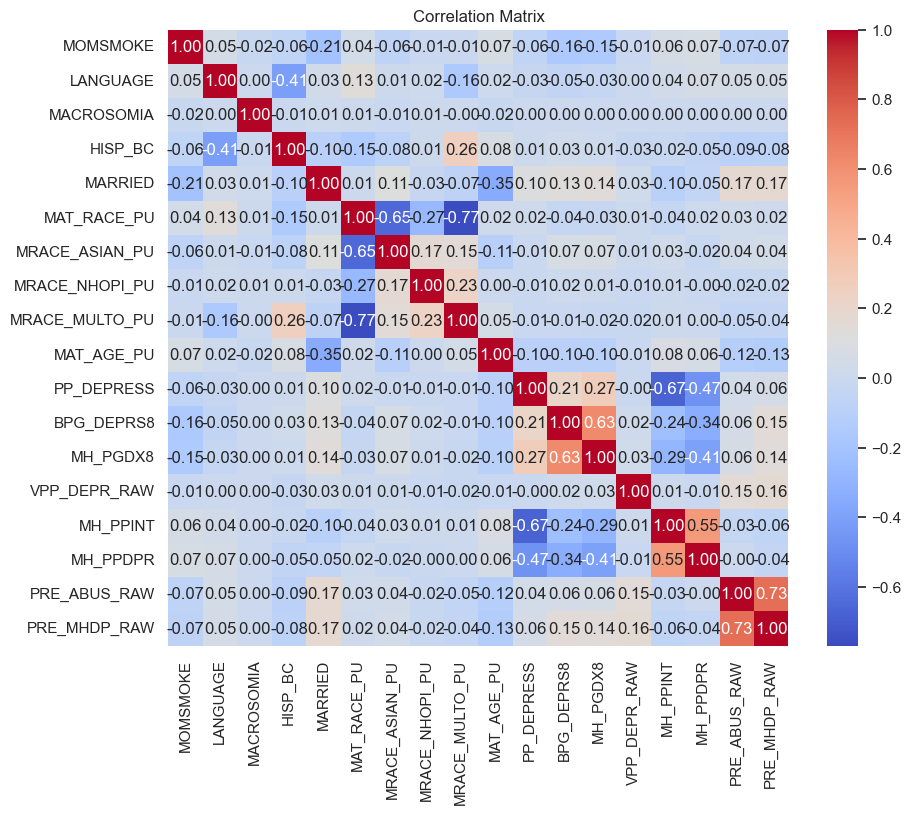

In [39]:
columnas_interes = ['MOMSMOKE', 'LANGUAGE', 'MACROSOMIA', 'HISP_BC', 'MARRIED', 'MAT_RACE_PU', 'MRACE_ASIAN_PU', 'MRACE_NHOPI_PU', 'MRACE_MULTO_PU', 'MAT_AGE_PU', 'PP_DEPRESS', 'BPG_DEPRS8', 'MH_PGDX8', 'VPP_DEPR_RAW', 'MH_PPINT', 'MH_PPDPR', 'PRE_ABUS_RAW', 'PRE_MHDP_RAW']
correlacion = df[columnas_interes].corr()

# Configura el tamaño de la figura
plt.figure(figsize=(10, 8))

# Crea la matriz de correlación utilizando seaborn
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f")

# Añade título
plt.title('Correlation Matrix')

# Muestra la gráfica
plt.show()

MOMSMOKE:Did mom smoke? <br>
LANGUAGE:Language -- English/Spanish/Chinese<br>
MARRIED:Marital status<br>
MACROSOMIA: Macrosomia: >= 4500 gram birth weigh<br>
HISP_BC:Mother Hispanic?<br>
MAT_RACE_PU: Maternal Race grouped <br>
MRACE_ASIAN_PU: Maternal Race Asian grouped<br>
MRACE_NHOPI_PU: Maternal Race Native Hawaiian Other Pacific Islander grouped<br>
MRACE_MULTO_PU: Maternal Race Multiple/Other<br>
MAT_AGE_PU: Maternal age grouped <br>
PP_DEPRESS: VAR: POST-PARTUM DEPRESSION INDICATOR<br>
BPG_DEPRS8: Health prob -- Depression<br>
MH_PGDX8: Health prob during preg -- Depression<br>
-VPP_DEPR_RAW: PPV -- ask about depression <br>
MH_PPINT: MH -- no interest since birth<br>
MH_PPDPR: MH -- depress since birth<br>
-PRE_ABUS_RAW: Pre-preg --hurt emotional/physical<br>
-PRE_MHDP_RAW: Pre-preg --feeling down/depressed<br>